 
 
 
 
 
# Data Preprocessing

**Import The Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle

**Reading The Dataset**

In [4]:
df = pd.read_csv("spam_ham_dataset.csv")

In [6]:
df.head()

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [7]:
df.tail()

Unnamed: 0 label                                               text  \
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1

**EDA On Dataset**

In [8]:
df=df.drop("Unnamed: 0",axis=1)

In [9]:
# Return the shape of data
df.shape

(5171, 3)

In [10]:
df.ndim

2

In [11]:
#Return the size of data
df.size

15513

In [12]:
#Returns the sum fo all na values 
df.isna().sum()

label        0
text         0
label_num    0
dtype: int64

**Understanding Data Type And Summary Of Features**

In [13]:
#Give concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [14]:
df.describe() #return improtant values for continous column data

label_num
count  5171.000000
mean      0.289886
std       0.453753
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

**Take Care Of Missing Data**

In [15]:
df.isnull().any()#it will return true if anyFalse column having null values

label        False
text         False
label_num    False
dtype: bool

In [16]:
#find null values
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

**Data Visualization**

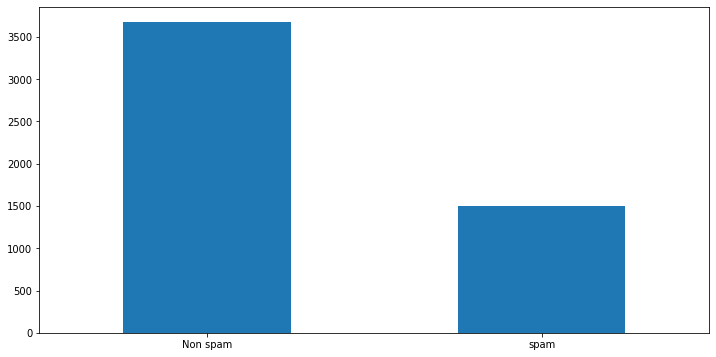

In [17]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ("Non spam", "spam"),rotation=0);

**Cleaning The Text**

In [18]:
import re #we are importing a re(Regular Expression) library, which is used to perform regex in python.
corpus = [] #Define an empty corpus list that can be used to store all the text after cleaning
length = len(df) #Initializing the var length with the length of the data frame.

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
for i in range(0,length): #running a loop from 0 to the length of our data frame.
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i]) #Removing all characters except the lower alphabet, Capital alphabets, and digits.
    text = text.lower() #Converting the text to lower
    text = text.split() #Splitting the text by spaces.
    pe = PorterStemmer() #creating an object of porter stemmer.
    stopword = stopwords.words("english") # Initializing all the stopword in English dictionary to var stopword
    text = [pe.stem(word) for word in text if not word in set(stopword)] # Initializing all the stopword in English dictionary to var stopword
    text = " ".join(text) # Just concatenating all the words to make a sentence
    corpus.append(text) #appending the sentence to the corpus list

In [39]:
corpus #Printing the corpus list

['subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb 25 januari 1 like think minut calend hand begin fall semest retreat schedul weekend januari 5 6 youth minist confer brad dustin connect week go chang date follow weekend januari 12 13 come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place 13 bedroom 5 bedroom hous

**CountVectorizer**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [22]:
#Extracting dependent variable from the dataset 
y = pd.get_dummies (df['label'])
y = y.iloc[:, 1].values

In [23]:
import pickle ## importing pickle used for dumping models 
pickle.dump (cv, open("cv-transform.pkl", 'wb')) ##saving to into cv-transform.pall file

**Split The Dataset Into Train Set And Test Set**

In [24]:
#Splitting data into train and validation sets using train_test_split

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)

# Model Building

**Build the model with the Multinomial Naive Bayes**

---



In [33]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [34]:
model.fit(X_train,y_train)

MultinomialNB()

**Prediction**

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

**Evaluating Model**

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print("Accuracy Score is:- ", score*100)

[[716  16]
 [ 17 286]]
Accuracy Score is:-  96.81159420289856


## Other Models

Here We check all ML algorithms for building the model.

**Build the model with the SVC using rbf Kernel**

In [25]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')
svm1.fit(X_train,y_train)

SVC()

In [26]:
y_pred4 = svm1.predict(X_test)
score4 = accuracy_score(y_test,y_pred4)
print("Accuracy Score is:- ", score4)

Accuracy Score is:-  0.9623188405797102


**Build the model with the SVC using Sigmoid Kernel**

In [27]:
svm2 = SVC(kernel='sigmoid')
svm2.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [28]:
y_pred5 = svm2.predict(X_test)
score5 = accuracy_score(y_test,y_pred5)
print("Accuracy Score is:- ", score5)

Accuracy Score is:-  0.9652173913043478


**Build the model with the Decision Tree Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred6 = dt.predict(X_test)
score6 = accuracy_score(y_test,y_pred6)
print("Accuracy Score is:- ", score6)

Accuracy Score is:-  0.9439613526570049


Let's compare the accuracy of all the models

In [37]:
models= pd.DataFrame({
    'Model': ['MultinomialNB', 'SVM-rbf','SVM-sigmoid','Decision Tree'],
    'Test Score':[score,score4,score5,score6]})
models.sort_values(by = 'Test Score',ascending = False)

Model  Test Score
0  MultinomialNB    0.968116
2    SVM-sigmoid    0.965217
1        SVM-rbf    0.962319
3  Decision Tree    0.943961

We check various ML Algorithm like Multinomial Naive Bayes,SVM-RBF,SVM-Sigmoid and Decision Tree but based on the dataset the accuracy score is higher for multinomial naive bayes so we save our model onto Multinomial Naive Bayes.

---



 
 
 
 
 
# Saving The Model

In [38]:
import pickle
pickle.dump(model, open("spam-sms-mnb-model.pkl","wb")) 
#Here, model is our Multinomial Naive Bayes with saving asspam-sms-mnb-model.pklfile.
#Wb is the write binary in bytes.